In [1]:
from sklearn.model_selection import train_test_split
from dataset_utils import generate_friedman1_dataset, load_ucirepo_dataset, generate_high_dim_classification, generate_large_synthetic_dataset
import numpy as np
from utils import plot_fraction_zero_vs_C, run_c_experiment_sparsity, plot_objective_histories, run_and_collect_histories, run_c_experiment_logloss, plot_mean_log_loss_vs_C, run_c_experiment_accuracy, plot_mean_accuracy_vs_C, run_features_number_experiment, plot_metric_vs_features

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Log objective history - artificial dataset

Training with method = 'L-BFGS-B'
  Train acc: 1.0000, Test acc: 1.0000
Training with method = 'SLSQP'


/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '
/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method SLSQP does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '


  Train acc: 1.0000, Test acc: 1.0000
Training with method = 'trust-constr'
  Train acc: 1.0000, Test acc: 1.0000
Training with method = 'TNC'
  Train acc: 1.0000, Test acc: 1.0000


/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method TNC does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '


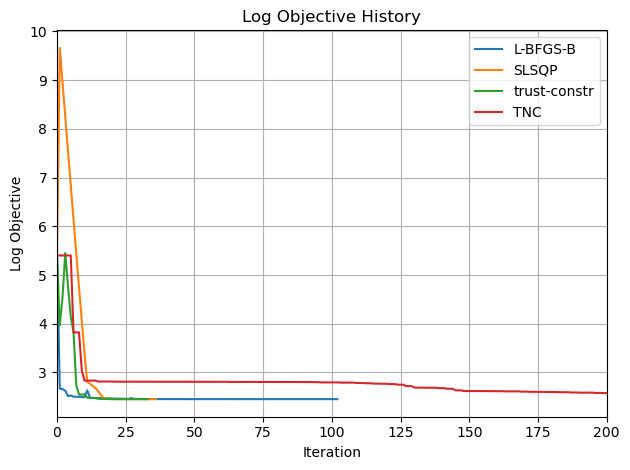

In [8]:
# Generate data
X, y = generate_friedman1_dataset()

# Convert labels to +1/-1
y = np.where(y == 1, 1, -1)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
# available methods https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
methods = [
    "L-BFGS-B", # Minimize a scalar function of one or more variables using the L-BFGS-B algorithm.
    "SLSQP", # Minimize a scalar function of one or more variables using Sequential Least Squares Programming (SLSQP).
    "trust-constr", # Minimization of scalar function of one or more variables using the Newton conjugate gradient trust-region algorithm.
    "TNC"
]
 
histories = run_and_collect_histories(
        X_train, y_train, X_test, y_test,
        C=2,
        methods=methods
    )

plot_objective_histories(histories, xlim = 200)

Training with method = 'L-BFGS-B'
  Train acc: 1.0000, Test acc: 0.6000
Training with method = 'SLSQP'


/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '
/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method SLSQP does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '


  Train acc: 1.0000, Test acc: 0.6000
Training with method = 'trust-constr'
  Train acc: 1.0000, Test acc: 0.6000
Training with method = 'TNC'
  Train acc: 1.0000, Test acc: 0.6000


/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method TNC does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '


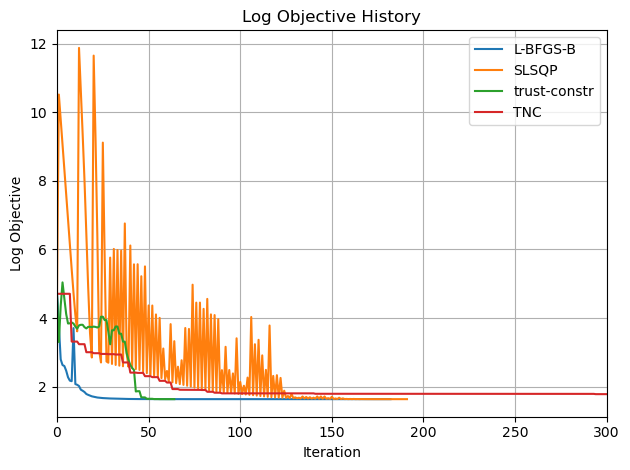

In [9]:
# Generate data
X, y = generate_high_dim_classification(
    n_samples=100,
    n_features=200,
    n_informative=175,
    random_state=42
)

# Convert labels to +1/-1
y = np.where(y == 1, 1, -1)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
# available methods https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html
methods = [
    "L-BFGS-B", # Minimize a scalar function of one or more variables using the L-BFGS-B algorithm.
    "SLSQP", # Minimize a scalar function of one or more variables using Sequential Least Squares Programming (SLSQP).
    "trust-constr", # Minimization of scalar function of one or more variables using the Newton conjugate gradient trust-region algorithm.
    "TNC"
]
 
histories = run_and_collect_histories(
        X_train, y_train, X_test, y_test,
        C=2,
        methods=methods
    )

plot_objective_histories(histories, xlim = 300)

## Log objective history - real dataset

Training with method = 'L-BFGS-B'
  Train acc: 0.9868, Test acc: 0.9561
Training with method = 'SLSQP'
  Train acc: 0.9868, Test acc: 0.9561
Training with method = 'trust-constr'
  Train acc: 0.9868, Test acc: 0.9561
Training with method = 'TNC'


/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '
/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method SLSQP does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '
/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method TNC does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '


  Train acc: 0.9868, Test acc: 0.9561


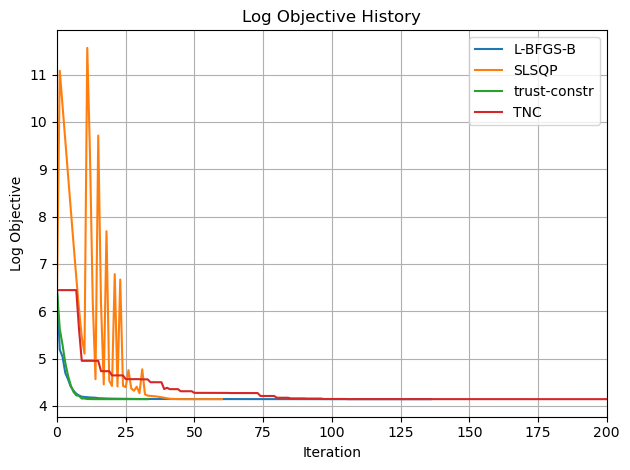

In [12]:
# Generate data
X, y = load_ucirepo_dataset(17)

# Convert labels to +1/-1
y = np.where(y == 1, 1, -1)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

methods = [
    "L-BFGS-B", # Minimize a scalar function of one or more variables using the L-BFGS-B algorithm.
    "SLSQP", # Minimize a scalar function of one or more variables using Sequential Least Squares Programming (SLSQP).
    "trust-constr", # Minimization of scalar function of one or more variables using the Newton conjugate gradient trust-region algorithm.
    "TNC"
]

histories = run_and_collect_histories(
        X_train, y_train, X_test, y_test,
        C=2,
        methods=methods
    )

plot_objective_histories(histories, xlim = 200)

## C vs loss

/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '


C=0 → mean log-loss=0.6931 ±0.0000
C=0.1005 → mean log-loss=0.1207 ±0.2150
C=0.201 → mean log-loss=0.0890 ±0.2258
C=0.3015 → mean log-loss=0.0770 ±0.2348
C=0.402 → mean log-loss=0.0704 ±0.2406
C=0.5025 → mean log-loss=0.0660 ±0.2441
C=0.603 → mean log-loss=0.0625 ±0.2453
C=0.7035 → mean log-loss=0.0599 ±0.2477
C=0.804 → mean log-loss=0.0579 ±0.2494
C=0.9045 → mean log-loss=0.0563 ±0.2511
C=1.005 → mean log-loss=0.0549 ±0.2529
C=1.106 → mean log-loss=0.0538 ±0.2547
C=1.206 → mean log-loss=0.0528 ±0.2553
C=1.307 → mean log-loss=0.0519 ±0.2563
C=1.407 → mean log-loss=0.0511 ±0.2570
C=1.508 → mean log-loss=0.0503 ±0.2568
C=1.608 → mean log-loss=0.0496 ±0.2558
C=1.709 → mean log-loss=0.0489 ±0.2554
C=1.809 → mean log-loss=0.0482 ±0.2537
C=1.91 → mean log-loss=0.0476 ±0.2511
C=2.01 → mean log-loss=0.0469 ±0.2499
C=2.111 → mean log-loss=0.0463 ±0.2484
C=2.211 → mean log-loss=0.0457 ±0.2468
C=2.312 → mean log-loss=0.0452 ±0.2450
C=2.412 → mean log-loss=0.0448 ±0.2441
C=2.513 → mean log-loss=0.

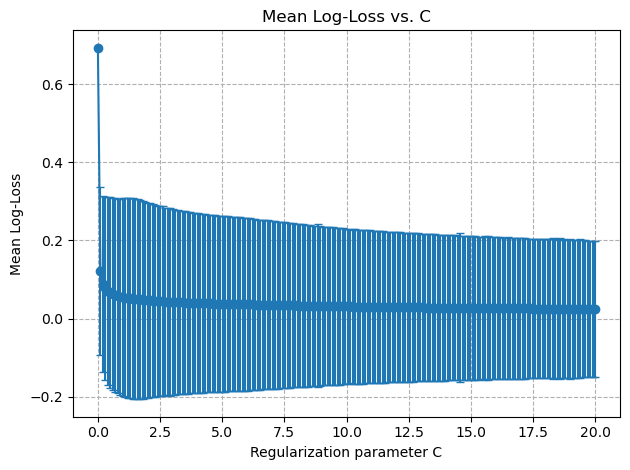

In [13]:
# Define grid of C values
Cs = np.linspace(0, 20, 200)

# Run experiment
Cs_arr, mean_losses, std_losses = run_c_experiment_logloss(
    Cs=Cs,
    method='L-BFGS-B',
    n_repeats=10,
    test_size=0.2,
    random_seed=0
)

# Identify best C
best_idx = np.argmin(mean_losses)
print(f"Optimal C = {Cs_arr[best_idx]:.4g}, Mean Log-Loss = {mean_losses[best_idx]:.4f} ± {std_losses[best_idx]:.4f}")

# Plot
plot_mean_log_loss_vs_C(Cs_arr, mean_losses, std_losses)

## C vs accuracy

/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '


C=0 → mean accuracy=0.3842 ±0.0501
C=0.1005 → mean accuracy=0.9684 ±0.0105
C=0.201 → mean accuracy=0.9702 ±0.0089
C=0.3015 → mean accuracy=0.9719 ±0.0094
C=0.402 → mean accuracy=0.9719 ±0.0110
C=0.5025 → mean accuracy=0.9693 ±0.0098
C=0.603 → mean accuracy=0.9711 ±0.0118
C=0.7035 → mean accuracy=0.9702 ±0.0105
C=0.804 → mean accuracy=0.9702 ±0.0105
C=0.9045 → mean accuracy=0.9711 ±0.0104
C=1.005 → mean accuracy=0.9719 ±0.0094
C=1.106 → mean accuracy=0.9728 ±0.0092
C=1.206 → mean accuracy=0.9728 ±0.0092
C=1.307 → mean accuracy=0.9719 ±0.0086
C=1.407 → mean accuracy=0.9728 ±0.0083
C=1.508 → mean accuracy=0.9728 ±0.0083
C=1.608 → mean accuracy=0.9737 ±0.0088
C=1.709 → mean accuracy=0.9737 ±0.0104
C=1.809 → mean accuracy=0.9719 ±0.0102
C=1.91 → mean accuracy=0.9702 ±0.0105
C=2.01 → mean accuracy=0.9711 ±0.0096
C=2.111 → mean accuracy=0.9711 ±0.0096
C=2.211 → mean accuracy=0.9711 ±0.0096
C=2.312 → mean accuracy=0.9702 ±0.0112
C=2.412 → mean accuracy=0.9702 ±0.0112
C=2.513 → mean accuracy=0.

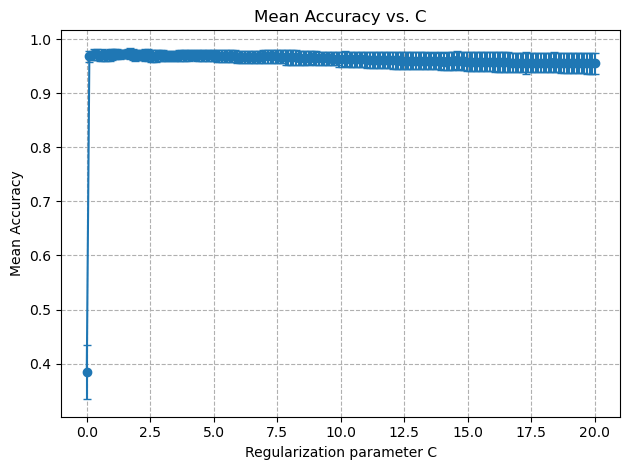

In [14]:
# Define grid of C values
Cs = np.linspace(0, 20, 200)

# Run experiment
Cs_arr, mean_acc, std_acc = run_c_experiment_accuracy(
    Cs=Cs,
    method='L-BFGS-B',
    n_repeats=10,
    test_size=0.2,
    random_seed=0
)

# Identify best C
best_idx = np.argmax(mean_acc)
print(f"Optimal C = {Cs_arr[best_idx]:.4g}, Mean Accuracy = {mean_acc[best_idx]:.4f} ± {std_acc[best_idx]:.4f}")

# Plot
plot_mean_accuracy_vs_C(Cs_arr, mean_acc, std_acc)

## Number of features vs log objective and time

/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '
/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method SLSQP does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '
/Users/blazejmisiura/anaconda3/envs/tf/lib/python3.9/site-packages/scipy/optimize/_minimize.py:571: RuntimeWarning: Method TNC does not use Hessian-vector product information (hessp).
  warn('Method %s does not use Hessian-vector product '


n_feat=1, method=L-BFGS-B  log_loss=3.9883±0.0421  fit_time=0.001s±0.001s
n_feat=1, method=SLSQP  log_loss=4.0133±0.0028  fit_time=0.001s±0.001s
n_feat=1, method=trust-constr  log_loss=3.9957±0.0315  fit_time=0.033s±0.016s
n_feat=1, method=TNC  log_loss=4.0003±0.0151  fit_time=0.001s±0.001s
n_feat=11, method=L-BFGS-B  log_loss=3.9501±0.0053  fit_time=0.001s±0.000s
n_feat=11, method=SLSQP  log_loss=3.9151±0.0770  fit_time=0.004s±0.004s
n_feat=11, method=trust-constr  log_loss=3.8861±0.0836  fit_time=0.058s±0.031s
n_feat=11, method=TNC  log_loss=3.8633±0.0118  fit_time=0.002s±0.000s
n_feat=21, method=L-BFGS-B  log_loss=3.7632±0.0942  fit_time=0.002s±0.000s
n_feat=21, method=SLSQP  log_loss=3.8131±0.0520  fit_time=0.006s±0.000s
n_feat=21, method=trust-constr  log_loss=3.7810±0.1191  fit_time=0.075s±0.022s
n_feat=21, method=TNC  log_loss=3.7120±0.0869  fit_time=0.004s±0.002s
n_feat=32, method=L-BFGS-B  log_loss=3.4485±0.0296  fit_time=0.003s±0.000s
n_feat=32, method=SLSQP  log_loss=3.4990±

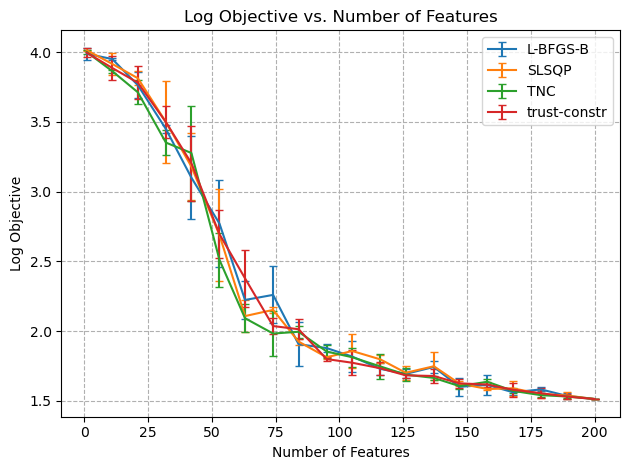

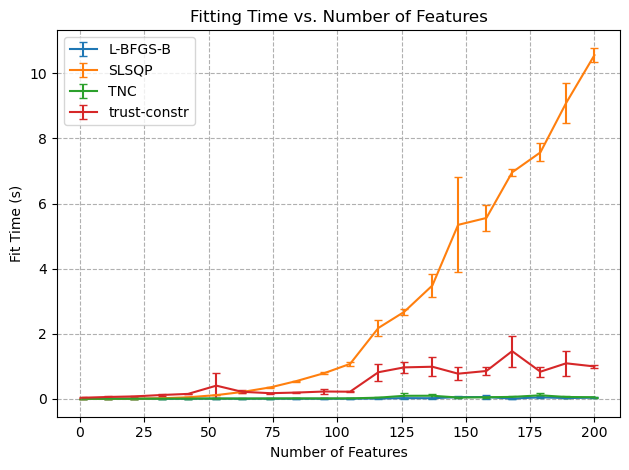

In [6]:
# Generate data
X, y = generate_high_dim_classification(
    n_samples=100,
    n_features=200,
    n_informative=175,
    random_state=42
)

# Convert labels to +1/-1
y = np.where(y == 1, 1, -1)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

methods = [
    "L-BFGS-B", # Minimize a scalar function of one or more variables using the L-BFGS-B algorithm.
    "SLSQP", # Minimize a scalar function of one or more variables using Sequential Least Squares Programming (SLSQP).
    "trust-constr", # Minimization of scalar function of one or more variables using the Newton conjugate gradient trust-region algorithm.
    "TNC"
]

features_numbers = np.linspace(1, X.shape[1], 20, dtype=int)

histories_features_number_experiment = run_features_number_experiment(
    X_train, y_train, C = 1.0, 
    methods = methods, 
    features_numbers = features_numbers, 
    n_repeats = 3, 
    random_state = 42
)

plot_metric_vs_features(
    features_numbers=features_numbers,
    histories=histories_features_number_experiment,
    metric="log_loss",
    y_label="Log Objective",
    title="Log Objective vs. Number of Features"
)

plot_metric_vs_features(
    features_numbers=features_numbers,
    histories=histories_features_number_experiment,
    metric="fit_time",
    y_label="Fit Time (s)",
    title="Fitting Time vs. Number of Features"
)

## Fraction zero parameters vs C

C=0, method=L-BFGS-B  x_plus_zero=1.0000±0.0000  x_minus_zero=1.0000±0.0000
C=0, method=SLSQP  x_plus_zero=1.0000±0.0000  x_minus_zero=1.0000±0.0000
C=0, method=trust-constr  x_plus_zero=0.0000±0.0000  x_minus_zero=0.0000±0.0000
C=0, method=TNC  x_plus_zero=1.0000±0.0000  x_minus_zero=1.0000±0.0000
C=0.5417, method=L-BFGS-B  x_plus_zero=0.8880±0.0160  x_minus_zero=0.8370±0.0076
C=0.5417, method=SLSQP  x_plus_zero=0.0040±0.0065  x_minus_zero=0.0060±0.0089
C=0.5417, method=trust-constr  x_plus_zero=0.0000±0.0000  x_minus_zero=0.0000±0.0000
C=0.5417, method=TNC  x_plus_zero=0.8880±0.0160  x_minus_zero=0.8370±0.0076
C=1.083, method=L-BFGS-B  x_plus_zero=0.8840±0.0207  x_minus_zero=0.8330±0.0115
C=1.083, method=SLSQP  x_plus_zero=0.1750±0.3802  x_minus_zero=0.1630±0.3645
C=1.083, method=trust-constr  x_plus_zero=0.0000±0.0000  x_minus_zero=0.0000±0.0000
C=1.083, method=TNC  x_plus_zero=0.8840±0.0207  x_minus_zero=0.8330±0.0115
C=1.625, method=L-BFGS-B  x_plus_zero=0.8790±0.0236  x_minus_zer

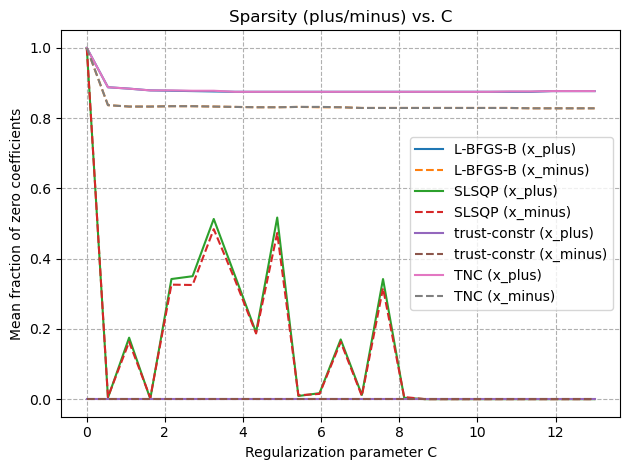

In [4]:
Cs = np.linspace(0, 13, 25)

methods = [
    "L-BFGS-B", # Minimize a scalar function of one or more variables using the L-BFGS-B algorithm.
    "SLSQP", # Minimize a scalar function of one or more variables using Sequential Least Squares Programming (SLSQP).
    "trust-constr", # Minimization of scalar function of one or more variables using the Newton conjugate gradient trust-region algorithm.
    "TNC" # Minimize a scalar function of one or more variables using the truncated Newton algorithm.
]

Cs_arr, mean_plus, std_plus, mean_minus, std_minus = run_c_experiment_sparsity(
    Cs=Cs,
    methods=methods,
    n_repeats=5,
    test_size=0.2,
    random_seed=42
)

plot_fraction_zero_vs_C(
    Cs=Cs_arr,
    mean_plus=mean_plus,
    std_plus=std_plus,
    mean_minus=mean_minus,
    std_minus=std_minus
)

# Impact of Regularization Strength (C) on Accuracy, Sparsity & Runtime (10k × 2k Synthetic Dataset)

In [17]:
X, y = generate_large_synthetic_dataset(
    n_samples        = 10_000,
    n_features       = 2_000,
    informative_fraction = 0.20,
    density          = 0.05,
    mean_shift       = 2.0,
    random_state     = 42,
    return_sparse=False
)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0
)

In [19]:
Cs         = np.logspace(-2, 2, 15)    # 0.01 … 100
acc        = []
n_active   = []
fit_time   = []

In [20]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from l1logisticregression import (
    L1LogisticRegression,
)


In [21]:
for C in Cs:
    clf   = L1LogisticRegression(C=C, method="L-BFGS-B")
    start = time.time()
    clf.fit(X_train, y_train)
    fit_time.append(time.time() - start)

    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

    n_active.append(np.count_nonzero(clf.coef_))

/Users/jakubswistak/Developer/optimization-project/l1logisticregression.py:144: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  res = minimize(
/Users/jakubswistak/Developer/optimization-project/l1logisticregression.py:144: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  res = minimize(
/Users/jakubswistak/Developer/optimization-project/l1logisticregression.py:144: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  res = minimize(
/Users/jakubswistak/Developer/optimization-project/l1logisticregression.py:144: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  res = minimize(
/Users/jakubswistak/Developer/optimization-project/l1logisticregression.py:144: RuntimeWarning: Method L-BFGS-B does not use Hessian-vector product information (hessp).
  res = minimize(
/Users/jakubswistak/Developer/optimization-project/l1logisticregr

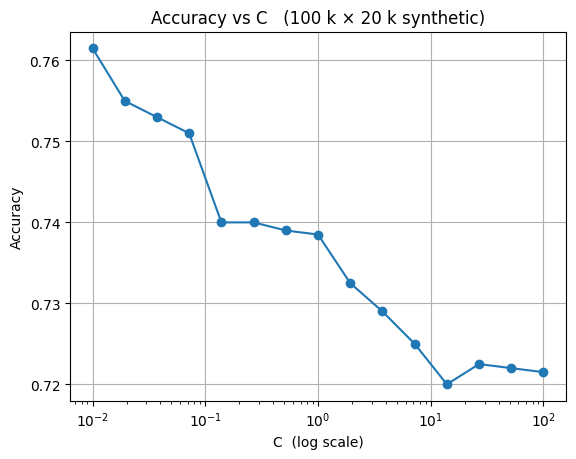

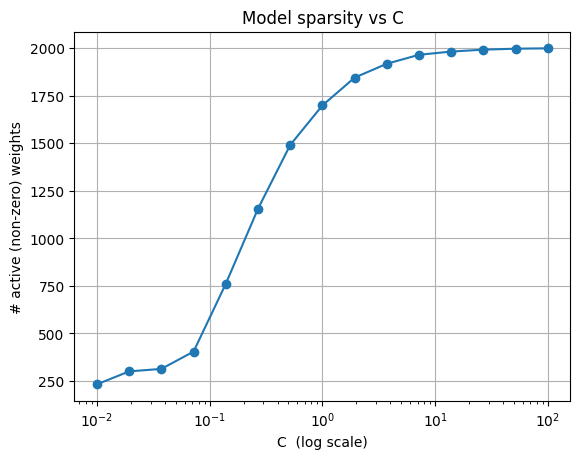

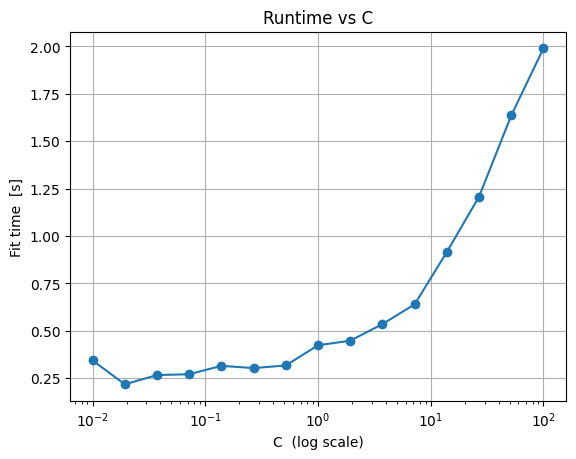

In [22]:
plt.figure()
plt.semilogx(Cs, acc, marker="o")
plt.xlabel("C  (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs C   (100 k × 20 k synthetic)")
plt.grid(True)

plt.figure()
plt.semilogx(Cs, n_active, marker="o")
plt.xlabel("C  (log scale)")
plt.ylabel("# active (non-zero) weights")
plt.title("Model sparsity vs C")
plt.grid(True)

plt.figure()
plt.semilogx(Cs, fit_time, marker="o")
plt.xlabel("C  (log scale)")
plt.ylabel("Fit time  [s]")
plt.title("Runtime vs C")
plt.grid(True)